In [1]:
import pandas as pd
import numpy as np

In [2]:
# use dataset

In [3]:
df = pd.read_csv('spam_ham_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.shape

(5171, 4)

In [6]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvements
#7. Website

# 1.Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()  
#  it converts labels into numerical values

In [9]:
df['label']=encoder.fit_transform(df['label'])
# it learns a mapping between the unique labels and integer values

In [10]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   int32 
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 141.5+ KB


In [12]:
df.sample(5)

,Unnamed: 0,label,text,label_num
2999,1451,0,Subject: re : meter 984132 for 1 / 16 / 99\r\n...,0
2309,4954,1,Subject: ladies rolex watches\r\ncall me at ro...,1
3955,3208,0,Subject: re : noms / actual for may 8 th\r\nwe...,0
3146,1615,0,"Subject: enron / hpl actuals for sept . 14 , 2...",0
2015,985,0,Subject: correction to hi 140\r\n- - - - - - -...,0


In [13]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
#missing values
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

0

In [16]:
df.shape

(5171, 4)

# 2. EDA

In [17]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [18]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [19]:
df.head()

,label,text,label_num
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,1,"Subject: photoshop , windows , office . cheap ...",1
4,0,Subject: re : indian springs\r\nthis deal is t...,0


In [20]:
df['label'].value_counts()

label
0    3672
1    1499
Name: count, dtype: int64

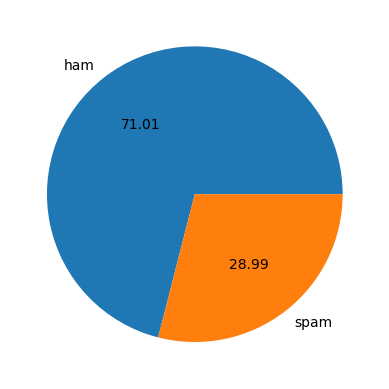

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()
# pie chart

In [22]:
# Data is imbalanced

In [23]:
import nltk #natural languagetool kit
# nltk is used for tokenization, preprocessing and feature extraction

In [24]:
# fetch the number of characters
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,label,text,label_num,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,1,"Subject: photoshop , windows , office . cheap ...",1,414
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336


In [26]:
# fetch number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,label,text,label_num,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [28]:
# fetch the number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,label,text,label_num,num_characters,num_words,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [31]:
#ham messages
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [32]:
#spam messages
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

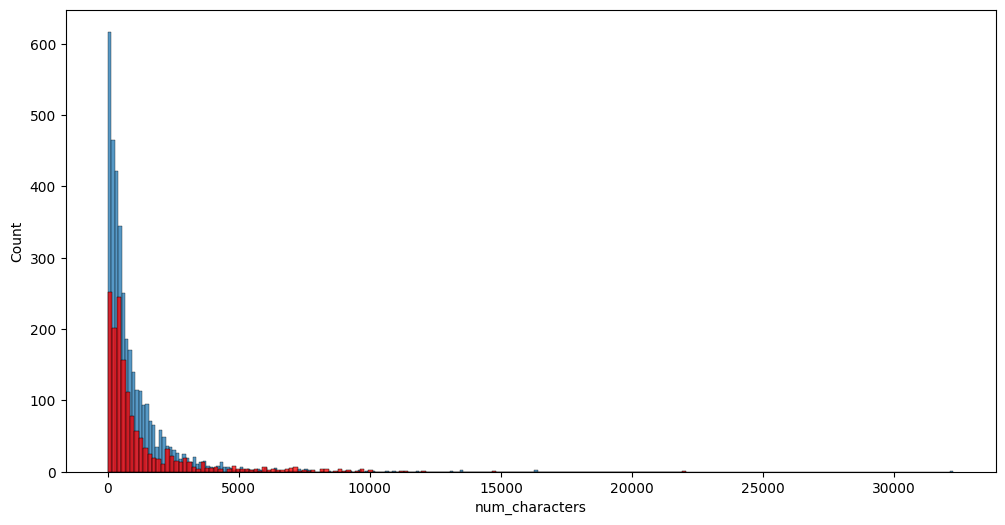

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

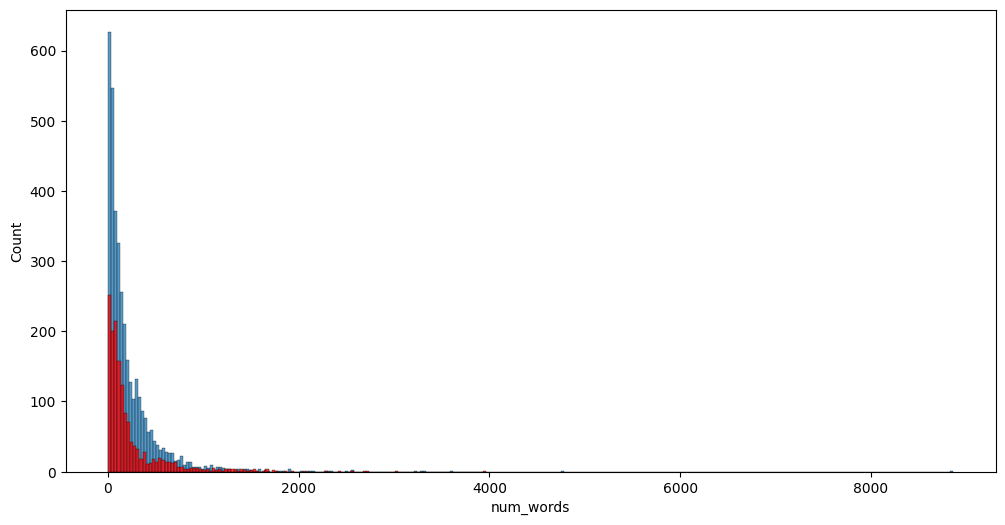

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

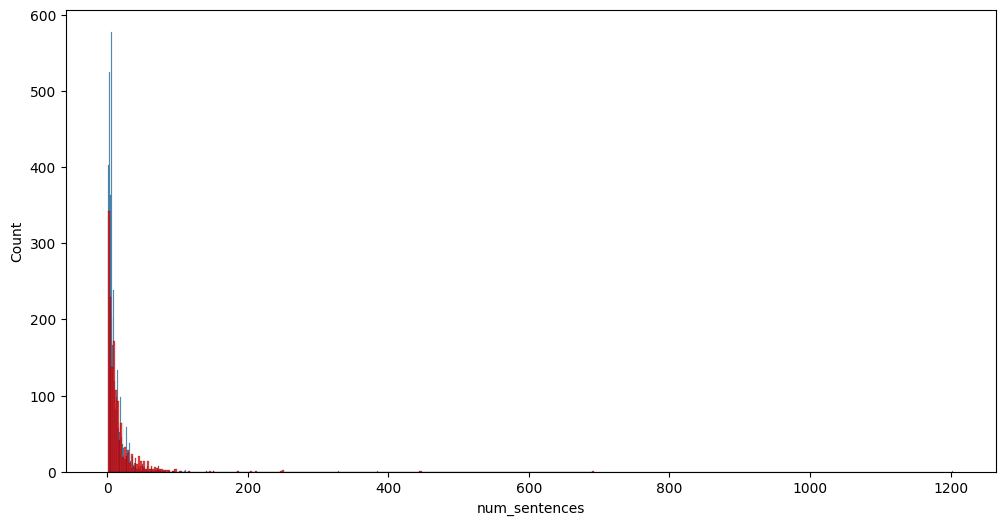

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['num_sentences'])
sns.histplot(df[df['label']==1]['num_sentences'],color='red')

C:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


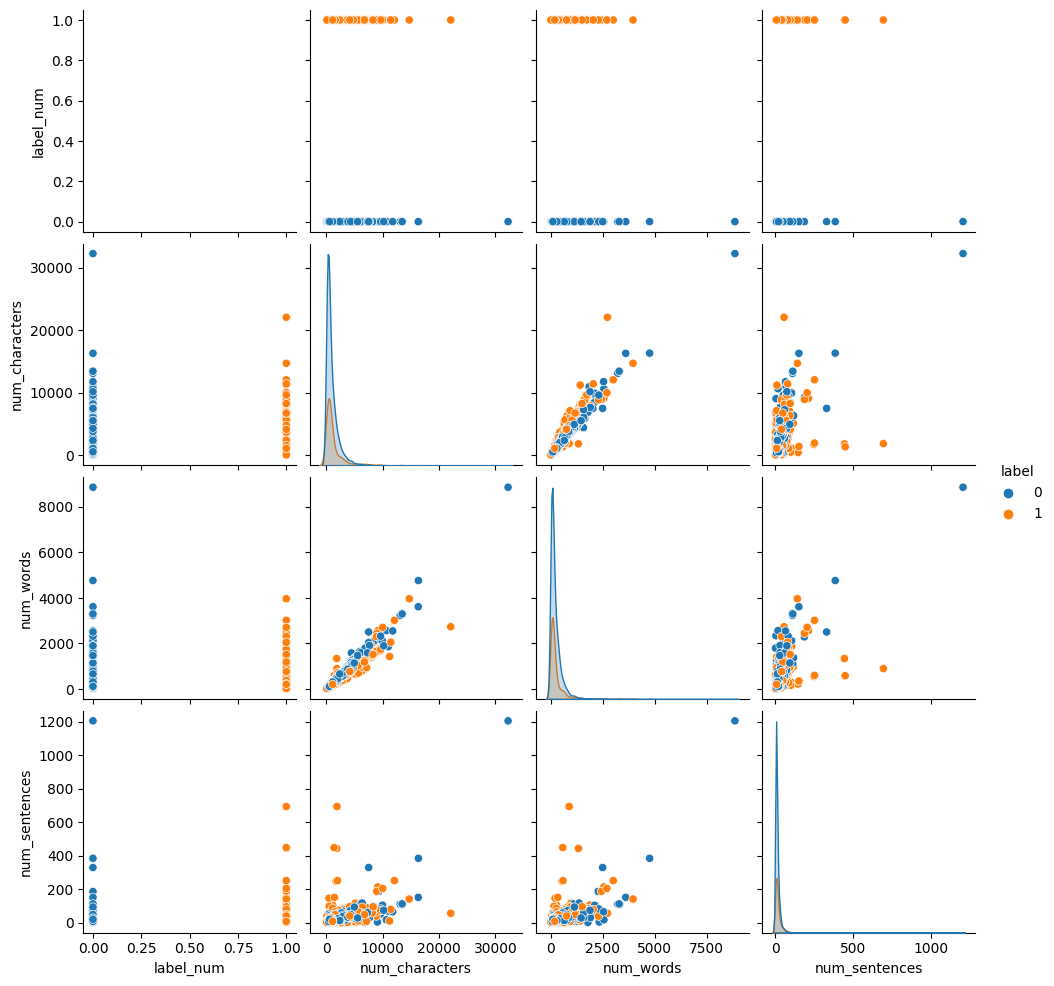

In [37]:
sns.pairplot(df,hue='label')
# pairplot is a grid of scatter plots

# 3. Data Preprocessing:
a. lower case
b. tokenization
c. removing special characters
d. removing stop words and punctuations
e. stemming

In [38]:
def transform_text(text):
    text=text.lower()  #converts entire text to lower case
    text=nltk.word_tokenize(text) # This line tokenizes the text, meaning it splits the text into individual words or tokens. 
    
    y=[] #This line initializes an empty list y that will be used to store the processed tokens.
    for i in text:  #This loop iterates through each token in the list text.
        if i.isalnum(): #alphanumeric
            y.append(i)
            
            
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #This condition checks if the token i is not in the list of English stopwords (common words like "the," "and," "is," etc.) and is not a punctuation character.
            y.append(i)
            
    text=y[:]
    y.clear
    
    for i in text:
        y.append(ps.stem(i)) # If the token meets the condition, it is passed through a stemming process using the Porter Stemmer (ps.stem(i)) to reduce words to their root form.
    
            
    return " ".join(y)

In [39]:
from nltk.corpus import stopwords # corpus : a large and structured collection of texts or spoken language that is used for linguistic analysis, research, and language modeling
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [42]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [43]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'loved yt lectures machine learning love yt lectur machin learn'

In [44]:
transform_text("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .")

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [45]:
df['transformed_text']=df['text'].apply(transform_text)

In [46]:
df.head()

,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom january 9 2001 see attached fi...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonderful...
3,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop windows office cheap main tr...
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian springs deal book teco pvr reve...


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" ") )

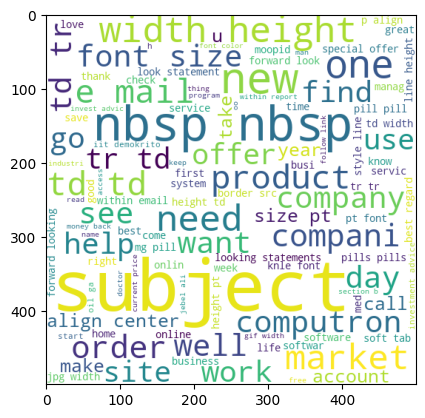

In [49]:
plt.imshow(spam_wc)

In [50]:
ham_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" ") )

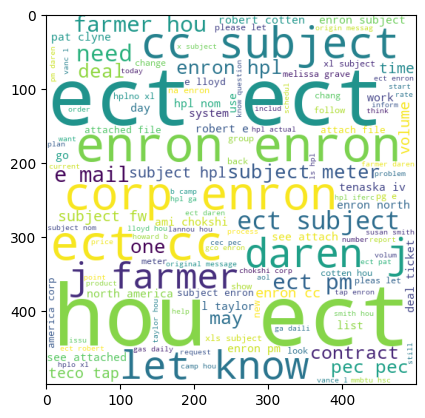

In [51]:
plt.imshow(ham_wc)

In [52]:
df.head()

,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom january 9 2001 see attached fi...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonderful...
3,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop windows office cheap main tr...
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian springs deal book teco pvr reve...


In [53]:
spam_corpus=[]
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

394904

In [55]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))
# most used spam words

,0,1
0,subject,3316
1,3,2478
2,com,1984
3,http,1967
4,2,1716
5,1,1440
6,0,1396
7,e,1276
8,price,1203
9,www,1174


In [56]:
ham_corpus=[]
for msg in df[df['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

777300

In [58]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))
# most used ham words

,0,1
0,ect,27794
1,hou,14562
2,enron,13110
3,subject,12808
4,2000,8616
5,deal,6338
6,com,5434
7,meter,5177
8,cc,4738
9,pm,4650


# 4.Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() #CountVectorizer is a class used for text preprocessing and feature extraction.
tfidf=TfidfVectorizer(max_features=3000) #TfidfVectorizer is another class used for text preprocessing and feature extraction.
#It converts a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.

In [60]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)

In [62]:
# appending the num_character col to x
x=np.hstack((x,df['num_characters'].values.reshape(-1,1))) #takes the existing array x and concatenates it with a new column derived from the "num_characters" column of the DataFrame df.(horizontal stack)

In [63]:
x.shape

(5171, 3001)

In [64]:
y=df['label'].values

In [65]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)  # 20% dataset for testing and 80% dataset for training

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
#The accuracy score is a measure of the overall correctness of a classification model. Formula: (Number of Correct Predictions) / (Total Number of Predictions)
#A confusion matrix is a table that is used to describe the performance of a classification model.It breaks down the predictions into four categories:
# True Positives (TP): Correctly predicted positive instances.
# True Negatives (TN): Correctly predicted negative instances.
# False Positives (FP): Incorrectly predicted positive instances (Type I error).
# False Negatives (FN): Incorrectly predicted negative instances (Type II error).
# Precision is a metric that focuses on the accuracy of positive predictions made by a classifier. It answers the question: "Of all the instances that the classifier predicted as positive, how many were actually positive?"
# Formula: Precision = TP / (TP + FP)

In [69]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
# GaussianNB is a type of Naive Bayes classifier that is typically used for classification tasks when the features (independent variables) are continuous and assumed to have a Gaussian (normal) distribution.
# MultinomialNB is a type of Naive Bayes classifier that is well-suited for text classification tasks when the features represent discrete data, such as word counts or term frequencies.
# BernoulliNB is another type of Naive Bayes classifier used for binary feature data, where features are either 0 or 1. It is well-suited for binary or Boolean data.

In [70]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642512077294686
[[719  27]
 [ 10 279]]
0.9117647058823529


In [71]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9333333333333333
[[692  54]
 [ 15 274]]
0.8353658536585366


In [72]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9265700483091788
[[685  61]
 [ 15 274]]
0.817910447761194


In [73]:
#tfidf-->MNB

In [74]:
from sklearn.linear_model import LogisticRegression #Implements logistic regression for binary and multiclass classification
from sklearn.svm import SVC #Performs classification using support vector machines (SVM) with various kernel functions.
from sklearn.naive_bayes import MultinomialNB #Multinomial Naive Bayes classifier for text and other discrete data.
from sklearn.tree import DecisionTreeClassifier # Builds decision tree classifiers that make decisions based on feature values.
from sklearn.neighbors import KNeighborsClassifier #K-nearest neighbors classifier that assigns labels based on the majority class of nearby data points.
from sklearn.ensemble import RandomForestClassifier #A classifier that uses an ensemble of decision trees to make predictions.
from sklearn.ensemble import AdaBoostClassifier #An ensemble classifier that combines the predictions of multiple weak classifiers to improve accuracy.
from sklearn.ensemble import BaggingClassifier #An ensemble classifier that uses bootstrapped subsets of the training data to train multiple base classifiers.
from sklearn.ensemble import ExtraTreesClassifier #An ensemble classifier similar to RandomForest but with extra randomness in feature selection.
from sklearn.ensemble import GradientBoostingClassifier #An ensemble classifier that builds decision trees sequentially to correct errors made by previous models.
from xgboost import XGBClassifier #An efficient and scalable gradient boosting library that is widely used for classification tasks.

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0) #The kernel parameter specifies the type of kernel function used by the SVM. 'sigmoid' is one of the available kernel functions. he gamma parameter is a hyperparameter that affects the shape and flexibility of the decision boundary created by the SVM.A higher gamma value makes the decision boundary more sensitive to individual data points, potentially leading to a more complex and wiggly decision boundary.
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear')  # liblinear' is an optimization algorithm designed for linear models with L1 and L2 regularization.
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [76]:
clfs ={
    'svc':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gdbt,
    'xgb':xgb
}

In [77]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [78]:
train_classifier(svc,x_train,y_train,x_test,y_test)

C:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7207729468599033, 0.0)

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  svc
Accuracy -  0.7207729468599033
Precision -  0.0
For  KN
Accuracy -  0.7140096618357488
Precision -  0.4816753926701571
For  NB
Accuracy -  0.9333333333333333
Precision -  0.8353658536585366
For  DT
Accuracy -  0.8338164251207729
Precision -  0.6302895322939867
For  LR
Accuracy -  0.9816425120772947
Precision -  0.95
For  RF
Accuracy -  0.9826086956521739
Precision -  0.9501661129568106
For  AdaBoost
Accuracy -  0.9623188405797102
Precision -  0.9058441558441559
For  BgC
Accuracy -  0.9632850241545894
Precision -  0.9035369774919614
For  ETC
Accuracy -  0.9835748792270531
Precision -  0.9594594594594594
For  GBDT
Accuracy -  0.9507246376811594
Precision -  0.9190140845070423
For  xgb
Accuracy -  0.9719806763285024
Precision -  0.9193548387096774


In [80]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.983575,0.959459
5,RF,0.982609,0.950166
4,LR,0.981643,0.950000
10,xgb,0.971981,0.919355
9,GBDT,0.950725,0.919014
6,AdaBoost,0.962319,0.905844
7,BgC,0.963285,0.903537
2,NB,0.933333,0.835366
3,DT,0.833816,0.630290
1,KN,0.714010,0.481675


In [82]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [83]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.983575
1,RF,Accuracy,0.982609
2,LR,Accuracy,0.981643
3,xgb,Accuracy,0.971981
4,GBDT,Accuracy,0.950725
5,AdaBoost,Accuracy,0.962319
6,BgC,Accuracy,0.963285
7,NB,Accuracy,0.933333
8,DT,Accuracy,0.833816
9,KN,Accuracy,0.714010


C:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ETC'),
  Text(1, 0, 'RF'),
  Text(2, 0, 'LR'),
  Text(3, 0, 'xgb'),
  Text(4, 0, 'GBDT'),
  Text(5, 0, 'AdaBoost'),
  Text(6, 0, 'BgC'),
  Text(7, 0, 'NB'),
  Text(8, 0, 'DT'),
  Text(9, 0, 'KN'),
  Text(10, 0, 'svc')])

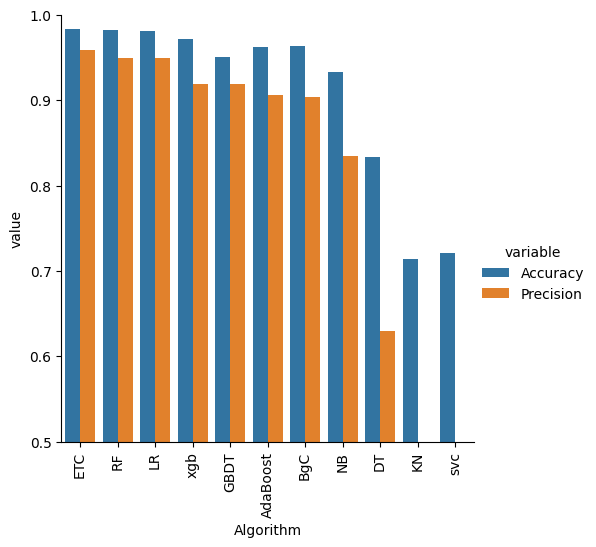

In [84]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')

In [85]:
#model improve
#1.Change the max features parameter of TfIdf

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,ETC,0.983575,0.959459,0.983575,0.959459
1,RF,0.982609,0.950166,0.982609,0.950166
2,LR,0.981643,0.950000,0.981643,0.950000
3,xgb,0.971981,0.919355,0.971981,0.919355
4,GBDT,0.950725,0.919014,0.950725,0.919014
5,AdaBoost,0.962319,0.905844,0.962319,0.905844
6,BgC,0.963285,0.903537,0.963285,0.903537
7,NB,0.933333,0.835366,0.933333,0.835366
8,DT,0.833816,0.630290,0.833816,0.630290
9,KN,0.714010,0.481675,0.714010,0.481675


In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [91]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,ETC,0.983575,0.959459,0.983575,0.959459,0.983575,0.959459
1,RF,0.982609,0.950166,0.982609,0.950166,0.982609,0.950166
2,LR,0.981643,0.950000,0.981643,0.950000,0.981643,0.950000
3,xgb,0.971981,0.919355,0.971981,0.919355,0.971981,0.919355
4,GBDT,0.950725,0.919014,0.950725,0.919014,0.950725,0.919014
5,AdaBoost,0.962319,0.905844,0.962319,0.905844,0.962319,0.905844
6,BgC,0.963285,0.903537,0.963285,0.903537,0.963285,0.903537
7,NB,0.933333,0.835366,0.933333,0.835366,0.933333,0.835366
8,DT,0.833816,0.630290,0.833816,0.630290,0.833816,0.630290
9,KN,0.714010,0.481675,0.714010,0.481675,0.714010,0.481675


In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [93]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.983575,0.959459,0.983575,0.959459,0.983575,0.959459,0.983575,0.959459
1,RF,0.982609,0.950166,0.982609,0.950166,0.982609,0.950166,0.982609,0.950166
2,LR,0.981643,0.950000,0.981643,0.950000,0.981643,0.950000,0.981643,0.950000
3,xgb,0.971981,0.919355,0.971981,0.919355,0.971981,0.919355,0.971981,0.919355
4,GBDT,0.950725,0.919014,0.950725,0.919014,0.950725,0.919014,0.950725,0.919014
5,AdaBoost,0.962319,0.905844,0.962319,0.905844,0.962319,0.905844,0.962319,0.905844
6,BgC,0.963285,0.903537,0.963285,0.903537,0.963285,0.903537,0.963285,0.903537
7,NB,0.933333,0.835366,0.933333,0.835366,0.933333,0.835366,0.933333,0.835366
8,DT,0.833816,0.630290,0.833816,0.630290,0.833816,0.630290,0.833816,0.630290
9,KN,0.714010,0.481675,0.714010,0.481675,0.714010,0.481675,0.714010,0.481675


In [94]:
# Voting Classifier-combines the predictions from multiple individual classifiers to make a final prediction.
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [96]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [97]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748792270531401
Precision 0.9311475409836065


In [98]:
# Applying stacking - combines multiple base classifiers (also known as level-0 models) to create a meta-classifier (level-1 model) that provides the final prediction. 
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [99]:
from sklearn.ensemble import StackingClassifier

In [100]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [101]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874396135265701
Precision 0.9758620689655172


In [102]:
df.head()

,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom january 9 2001 see attached fi...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonderful...
3,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop windows office cheap main tr...
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian springs deal book teco pvr reve...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
import tkinter as tk
from tkinter import *

# Load your dataset and perform data preprocessing (excluding the actual data loading code)
data = pd.read_csv("spam_ham_dataset.csv", encoding="latin-1")
data.drop(['Unnamed: 0'], axis=1, inplace=True)

def normalize(text):
    text = text.lower()
    return text

data['text'] = data['text'].apply(normalize)

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.1, random_state=1)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
svm_classifier = svm.SVC(C=1000)
svm_classifier.fit(X_train, y_train)

def check_spam(text):
    text = vectorizer.transform([text])
    prediction = svm_classifier.predict(text)
    return prediction[0]

# GUI Setup
top = tk.Tk()
top.geometry('1000x600')
top.title('Spam Detector')
top.configure(background='white')

result_label = None
accuracy_label = None

def calculate_accuracy(text):
    X_test = vectorizer.transform([text])
    y_pred = svm_classifier.predict(X_test)

    spam_count = sum(y_pred == 'spam')
    ham_count = sum(y_pred == 'ham')

    total_spam = len(y_pred[y_pred == 'spam'])
    total_ham = len(y_pred[y_pred == 'ham'])

    accuracy_spam = spam_count / total_spam * 100 if total_spam > 0 else 0
    accuracy_ham = ham_count / total_ham * 100 if total_ham > 0 else 0

    return accuracy_spam, accuracy_ham

def update_accuracy_labels(event):
    global accuracy_label
    text = message_text.get('1.0', END)
    spam_accuracy, ham_accuracy = calculate_accuracy(text)
    
    accuracy_text = f"Accuracy (Spam): {spam_accuracy:.2f}%\nAccuracy (Ham): {ham_accuracy:.2f}%"

    accuracy_label.config(text=accuracy_text)

def check(message_text):
    global result_label
    result = check_spam(message_text.get('1.0', END))
    if result == 'spam':
        result = 'Definitely spam'
    else:
        result = 'Not a spam'

    result_label.config(text=result)

    update_accuracy_labels(None)

def show_test_button(new_window, message_text, check_function):
    test_button = Button(new_window, text="Test me", command=lambda: check_function(message_text), padx=10, pady=5)
    test_button.place(relx=0.33, rely=0.83)

def new_test():
    new_window = Toplevel()
    new_window.geometry('900x470')
    new_window.title('Test New Message')
    new_window.configure(background='#ebf9f7')

    new_text = Label(new_window, text='Type in a message to check')
    new_text.configure(background='#ebf9f7', foreground='#05232c', font='arial 14 bold')
    new_text.pack(side='top', pady=25)

    global message_text
    message_text = Text(new_window, height=15, width=55)
    message_text.insert(END, 'Put your message here')
    message_text.tag_add(SEL, '1.0', END)
    message_text.focus_set()
    message_text.place(relx=0.13, rely=0.25)
    message_text.bind('<KeyRelease>', update_accuracy_labels)

    show_test_button(new_window, message_text, check)

    global result_label
    result_label = Label(new_window, text='', font='arial 14 bold', background='#ebf9f7', foreground='#05232c')
    result_label.place(relx=0.33, rely=0.9)

    global accuracy_label
    accuracy_label = Label(new_window, text='', font='arial 14', background='#ebf9f7', foreground='#05232c')
    accuracy_label.place(relx=0.1, rely=0.7)

def show_help():
    help_window = Toplevel()
    help_window.geometry('900x470')
    help_window.title('Help - Spam Detector')
    help_window.configure(background='#ebf9f7')

    spam_text = Label(help_window, text='What is Spam?')
    spam_text.configure(background='#ebf9f7', foreground='#05232c', font='arial 14 bold underline')
    spam_text.place(relx=0.06, rely=0.08)

    spam_help_text = Label(help_window, text='Spam is any irrelevant and/or unsolicited messages you may receive over the Internet')
    spam_help_text.configure(background='#ebf9f7', foreground='#05232c', font='arial')
    spam_help_text.place(relx=0.06, rely=0.18)

    sd_text = Label(help_window, text='What is Spam Detector?')
    sd_text.configure(background='#ebf9f7', foreground='#05232c', font='arial 14 bold underline')
    sd_text.place(relx=0.06, rely=0.45)

    sd_help_text = Label(help_window, text='This spam detector helps you identify whether a message is spam or ham. Just put in a message and check the result')
    sd_help_text.configure(background='#ebf9f7', foreground='#05232c', font='arial 14 bold underline')
    sd_help_text.place(relx=0.06, rely=0.52)

new_button = Button(top, text='Test a message', command=new_test, padx=20, pady=7)
new_button.configure(background='#09B29D', foreground='white', font=('arial', 13, 'bold'))
new_button.place(relx=0.42, rely=0.84)

sample = Button(top, command=show_help, padx=10, pady=5, borderwidth=0, cursor='hand2', text="Help", compound='left')
sample.place(relx=0.90, rely=0.06)

top.mainloop()
